In [2]:
import tensorflow as tf 
from tensorflow.keras import models, layers 
import matplotlib.pyplot as plt 

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory='F:\\projects\\gabbage classification ( 12 classes)\\garbage_classification',
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(512, 384),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True
)

Found 15515 files belonging to 12 classes.


In [4]:
class_names = dataset.class_names
print(class_names)

['battery', 'biological', 'brown-glass', 'cardboard', 'clothes', 'green-glass', 'metal', 'paper', 'plastic', 'shoes', 'trash', 'white-glass']


In [5]:
len(dataset)

485

In [6]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 512, 384, 3)
[ 7  9  4 11  3 11  4  4  4  4  1  9  9  4  4  2  7  3  7  6  4  4  4  9
  0  4  4  1  8  9  4  7]


In [7]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch[0].numpy())

[[[125.021484 122.021484 117.021484]
  [125.08264  122.08264  117.08264 ]
  [126.10193  123.10193  118.10193 ]
  ...
  [187.       186.       181.      ]
  [186.0625   185.0625   180.0625  ]
  [186.       185.       180.      ]]

 [[126.06445  123.06445  118.06445 ]
  [126.060425 123.060425 118.060425]
  [125.993286 122.993286 117.993286]
  ...
  [187.00671  186.00671  181.00671 ]
  [186.12292  185.12292  180.12292 ]
  [186.06445  185.06445  180.06445 ]]

 [[126.997765 123.997765 118.997765]
  [126.83679  123.83679  118.83679 ]
  [125.895836 122.895836 117.895836]
  ...
  [187.20042  186.20042  181.20042 ]
  [187.00671  186.00671  181.00671 ]
  [187.       186.       181.      ]]

 ...

 [[ 81.020836  81.020836  73.020836]
  [ 82.125     82.125     74.125   ]
  [ 84.3125    84.3125    76.3125  ]
  ...
  [193.       192.       188.      ]
  [192.0625   191.0625   187.0625  ]
  [192.       191.       187.      ]]

 [[ 81.020836  81.020836  73.020836]
  [ 82.125     82.125     74.125   ]


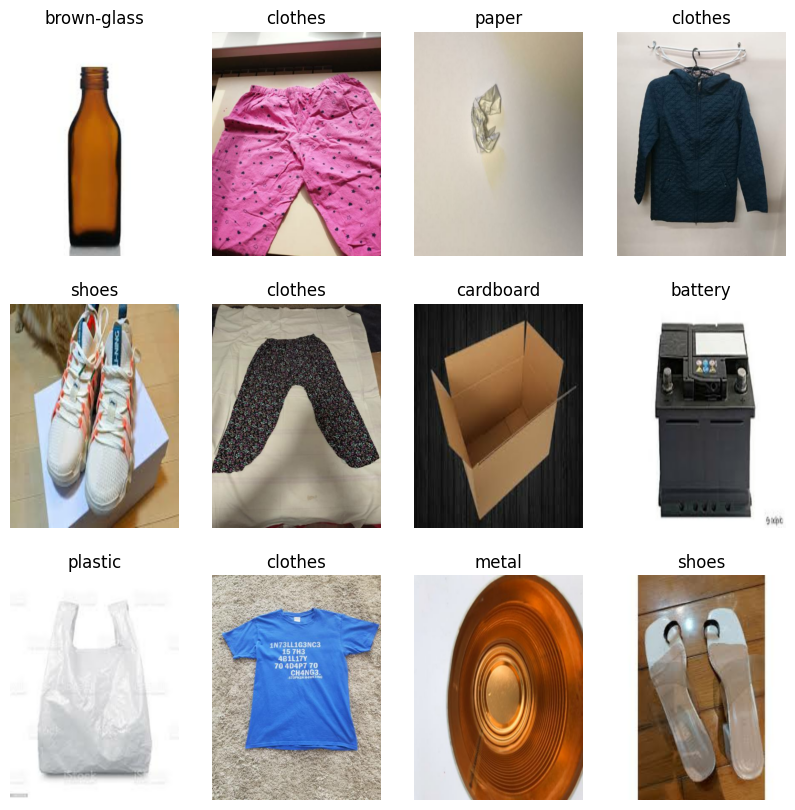

In [8]:
plt.figure(figsize=(10, 10))

for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

plt.show()

In [9]:
train_size  = 0.8
len(dataset) * train_size

388.0

In [10]:
train_ds = dataset.take(63)
len(train_ds)

63

In [11]:
test_ds = dataset.skip(63)
len(test_ds)

422

In [12]:
val_size = 0.1
len(dataset)*0.1 

48.5

In [13]:
val_ds = dataset.take(7)
len(val_ds)

7

In [14]:
test_ds = test_ds.skip(7)
len(test_ds)

415

In [15]:
def get_dataset_partitions(dataset, 
                           train_split=0.7, 
                           val_split=0.1, 
                           test_split=0.1, 
                           shuffle=True, 
                           shuffle_size=10000):

    dataset_size = len(dataset)

    if shuffle:
        dataset = dataset.shuffle(shuffle_size, seed=12)

    train_size = int(train_split * dataset_size)
    val_size = int(val_split * dataset_size)

    train_ds = dataset.take(train_size)
    val_ds = dataset.skip(train_size).take(val_size)
    test_ds = dataset.skip(train_size + val_size)

    return train_ds, val_ds, test_ds
    

In [17]:
train_ds, val_ds, test_ds = get_dataset_partitions(dataset)

In [18]:
len(train_ds), len(val_ds), len(test_ds)

(339, 48, 98)

In [19]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)